Warning message:
: package 'forecast' was built under R version 3.2.5Loading required package: zoo
Warning message:
: package 'zoo' was built under R version 3.2.5
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
Warning message:
: package 'timeDate' was built under R version 3.2.3This is forecast 7.1 

Warning message:
: package 'car' was built under R version 3.2.5

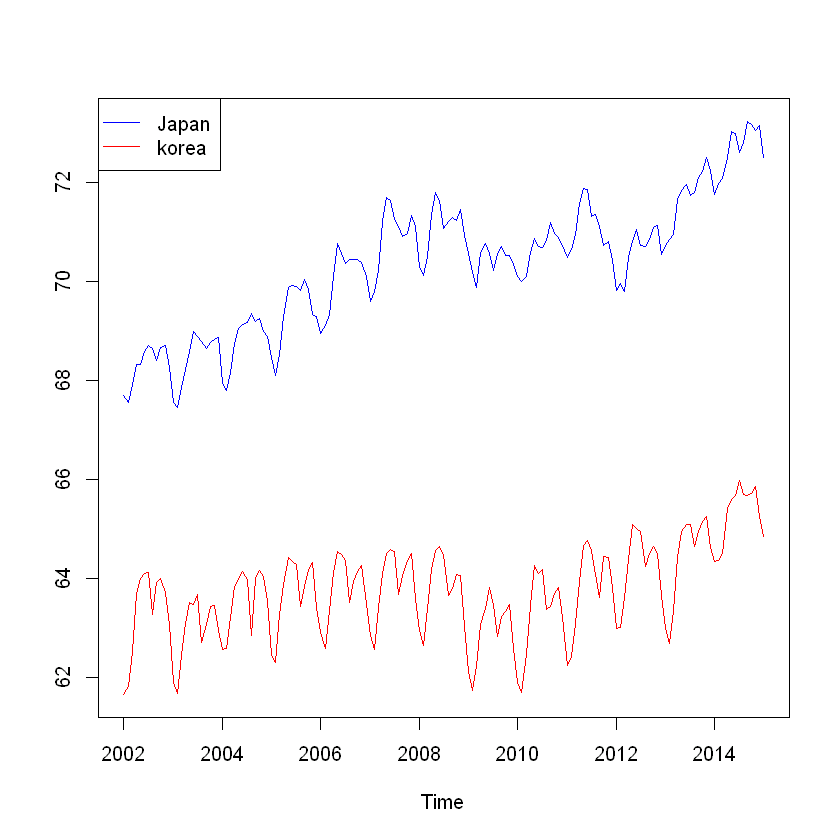

In [1]:
library(forecast)
library(car)
options(scipen=999)

jp_data <- read.csv2("japan_employment.csv")
kr_data <- read.csv2("korea_employment.csv")
jp_ts <- ts(jp_data$Value, start=c(2002, 01), end=c(2015, 01), frequency=12)
kr_ts <- ts(kr_data$Value, start=c(2002, 01), end=c(2015, 01), frequency=12)

ts.plot(jp_ts, kr_ts, gpars= list(col = c("blue", "red")))

legend( x="topleft", 
        legend=c("Japan","korea"),
        col=c("blue","red"), lwd=1, 
        pch=c(NA,NA))

[1] "Durbin watson > 1"


[1] 1.253902

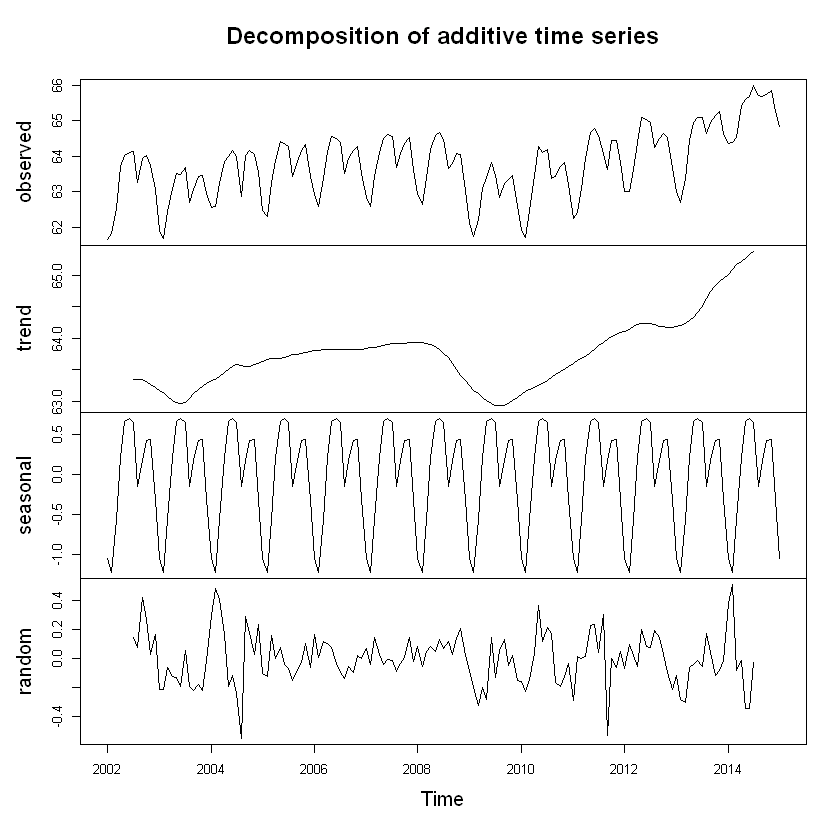

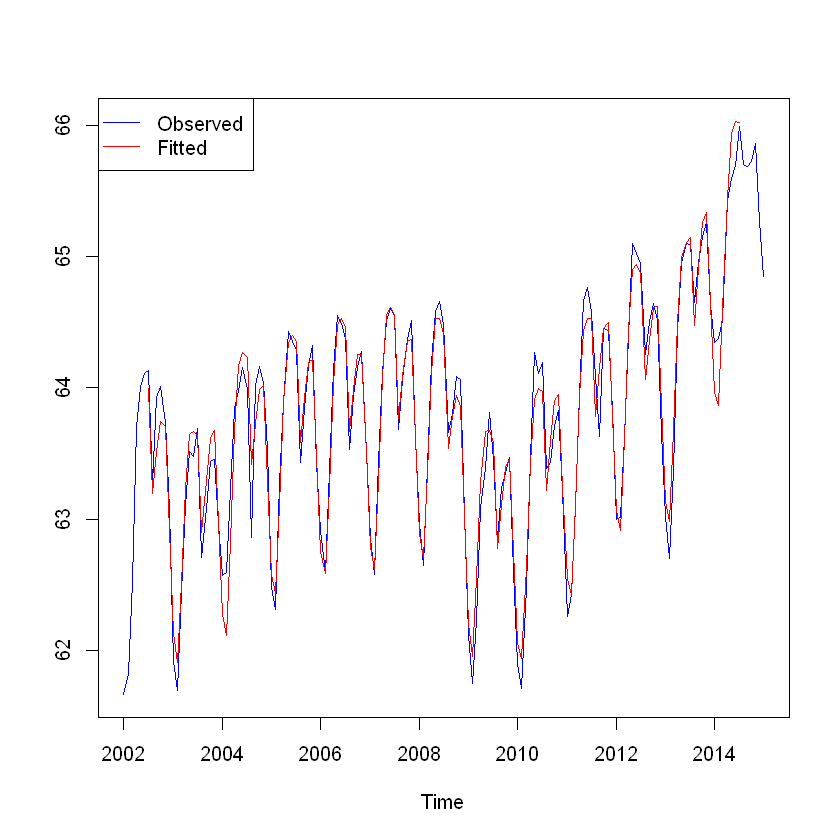

In [20]:

kr_dec <- decompose(kr_ts, type = "additive")
plot(kr_dec)
residuals <- na.omit(as.vector(kr_dec$random))
print("Durbin watson > 1")
durbinWatsonTest(as.vector(residuals))

fitted <- kr_dec$trend + kr_dec$seasonal
ts.plot(kr_dec$x, fitted, gpars= list(col = c("blue", "red")))

legend( x="topleft", 
        legend=c("Observed","Fitted"),
        col=c("blue","red"), lwd=1, 
        pch=c(NA,NA))

[1] "Durbin watson < 1"


[1] 0.9222358

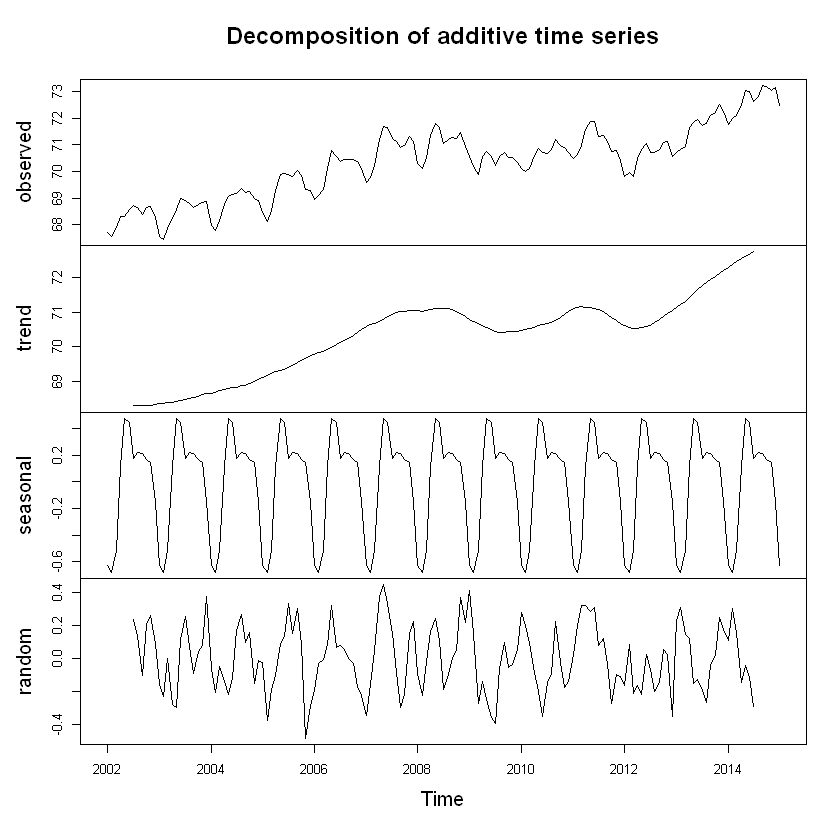

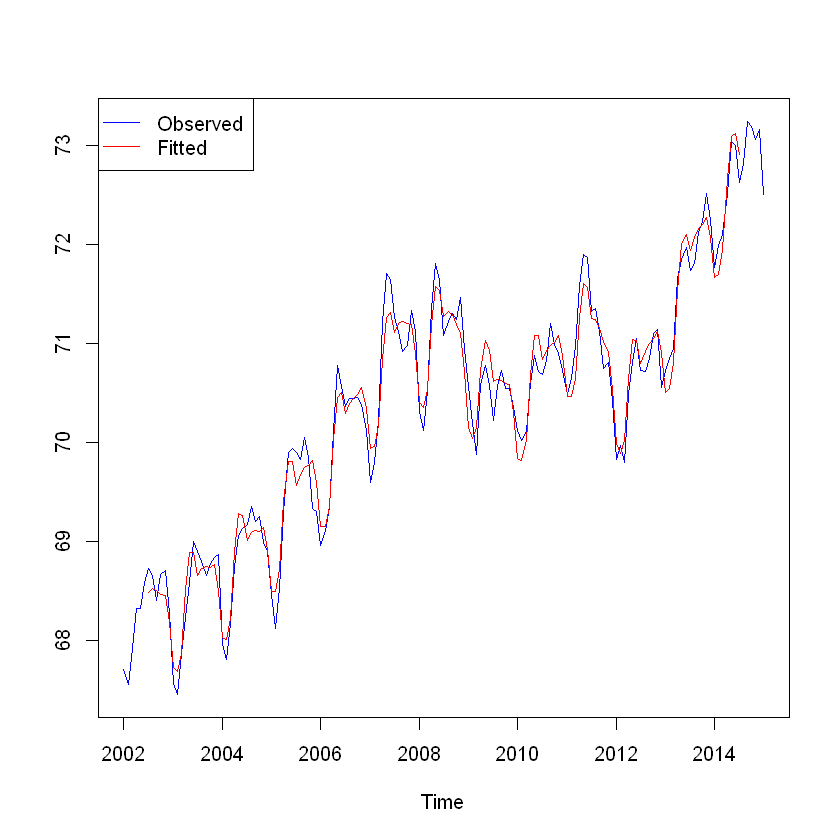

In [19]:
jp_dec <- decompose(jp_ts, type = "additive")
plot(jp_dec)
residuals <- na.omit(as.vector(jp_dec$random))
print("Durbin watson < 1")
durbinWatsonTest(as.vector(residuals))

fitted <- jp_dec$trend + jp_dec$seasonal
ts.plot(jp_dec$x, fitted, gpars= list(col = c("blue", "red")))

legend( x="topleft", 
        legend=c("Observed","Fitted"),
        col=c("blue","red"), lwd=1, 
        pch=c(NA,NA))

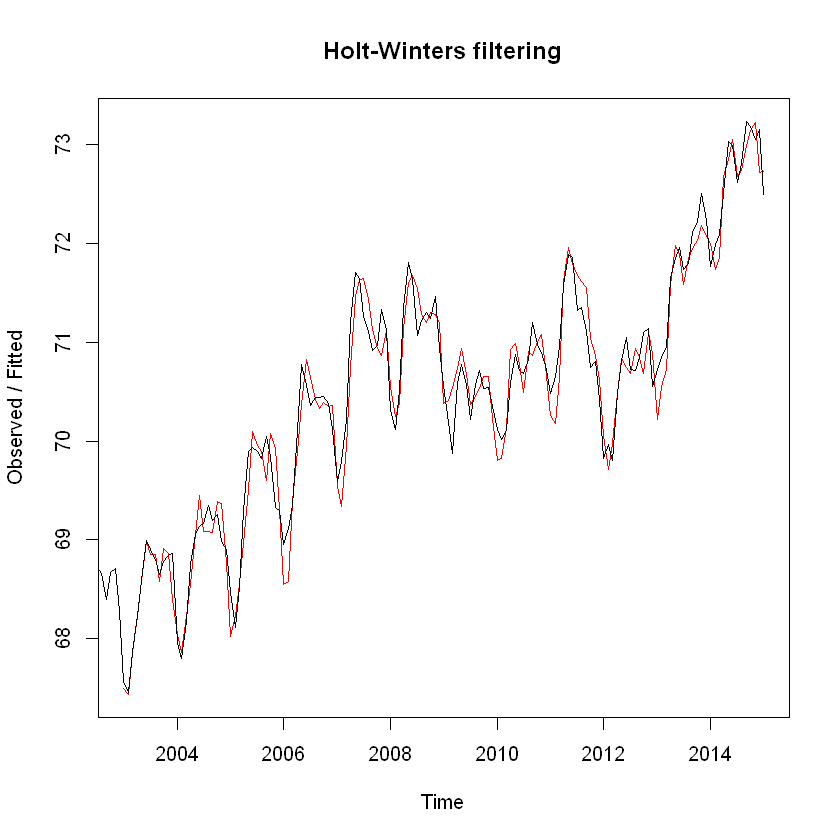

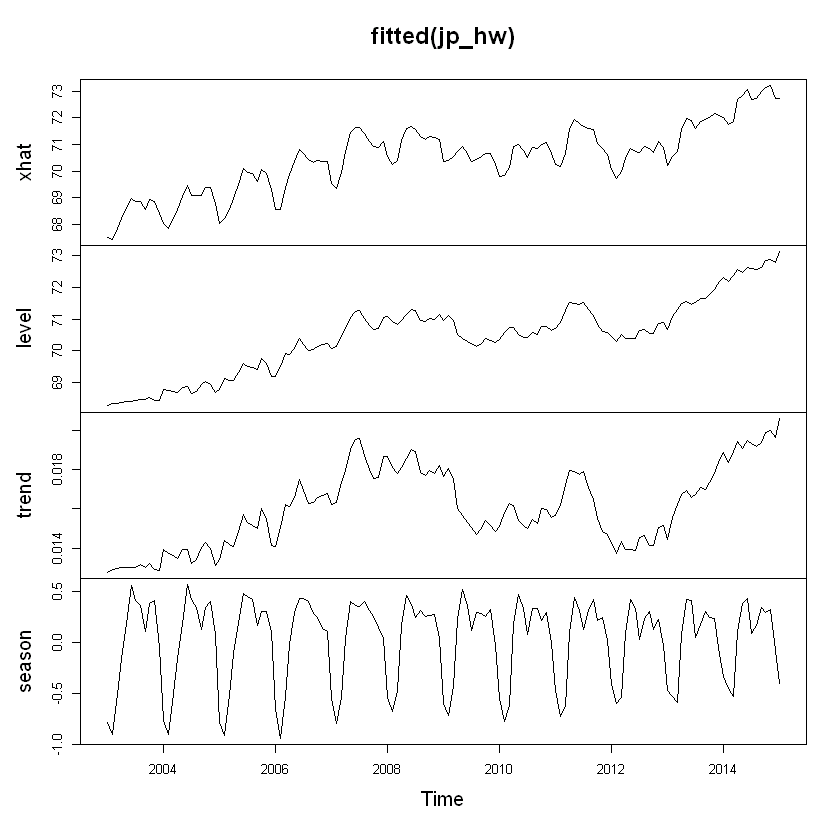

In [23]:
jp_hw <- HoltWinters(jp_ts)
plot(jp_hw)
plot(fitted(jp_hw))